In [1]:
import firedrake as fd

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Flow in Cylinder

In [ ]:
print(V)
print(Q)

In [ ]:
print("Setting up solver.")

# physical constants
nu = fd.Constant(0.001)

# time step
dt = 0.001
# define a firedrake constant equal to dt so that variation forms 
# not regenerated if we change the time step
k = fd.Constant(dt)

mesh = fd.Mesh("../meshes/flow_past_cylinder.msh")

V = fd.VectorFunctionSpace(mesh, "CG", 2)
Q = fd.FunctionSpace(mesh, "CG", 1)

u = fd.TrialFunction(V)
# print(type(u))
v = fd.TestFunction(V)
# print(v)

p = fd.TrialFunction(Q)
q = fd.TestFunction(Q)

u_now = fd.Function(V)
u_next = fd.Function(V)
u_star = fd.Function(V)
p_now = fd.Function(Q)
p_next = fd.Function(Q)

# Expressions for the variational forms
n = fd.FacetNormal(mesh)
f = fd.Constant((0.0, 0.0))
u_mid = 0.5*(u_now + u)

def sigma(u, p):
    return 2*nu*fd.sym(fd.nabla_grad(u)) - p*fd.Identity(len(u))

u_list = []

x, y = fd.SpatialCoordinate(mesh)

# Define boundary conditions
bcu = [fd.DirichletBC(V, fd.Constant((0,0)), (1, 4)), # top-bottom and cylinder
          fd.DirichletBC(V, ((4.0*1.5*y*(0.41 - y) / 0.41**2) ,0), 2)] # inflow
bcp = [fd.DirichletBC(Q, fd.Constant(0), 3)]  # outflow

# Define variational forms
F1 = fd.inner((u - u_now)/k, v) * fd.dx \
    + fd.inner(fd.dot(u_now, fd.nabla_grad(u_mid)), v) * fd.dx \
    + fd.inner(sigma(u_mid, p_now), fd.sym(fd.nabla_grad(v))) * fd.dx \
    + fd.inner(p_now * n, v) * fd.ds \
    - fd.inner(nu * fd.dot(fd.nabla_grad(u_mid), n), v) * fd.ds \
    - fd.inner(f, v) * fd.dx

# print(F1)

a1, L1 = fd.system(F1)

# a2 = fd.inner(fd.nabla_grad(p), fd.nabla_grad(q)) * fd.dx
# L2 = fd.inner(fd.nabla_grad(p_now), fd.nabla_grad(q)) * fd.dx \
#     - (1/k) * fd.inner(fd.div(u_star), q) * fd.dx

F2 = fd.inner(fd.nabla_grad(p), fd.nabla_grad(q)) * fd.dx \
    - fd.inner(fd.nabla_grad(p_now), fd.nabla_grad(q)) * fd.dx \
    + (1/k) * fd.inner(fd.div(u_star), q) * fd.dx

a2, L2 = fd.system(F2)

# a3 = fd.inner(u, v) * fd.dx
# L3 = fd.inner(u_star, v) * fd.dx \
#      - k * fd.inner(fd.nabla_grad(p_next - p_now), v) * fd.dx

F3 = fd.inner(u, v) * fd.dx \
     - fd.inner(u_star, v) * fd.dx \
     + k * fd.inner(fd.nabla_grad(p_next - p_now), v) * fd.dx

a3, L3 = fd.system(F3)

# Define linear problems
prob1 = fd.LinearVariationalProblem(a1, L1, u_star, bcs=bcu)
prob2 = fd.LinearVariationalProblem(a2, L2, p_next, bcs=bcp)
prob3 = fd.LinearVariationalProblem(a3, L3, u_next, bcs=None)
print(prob1, prob2, prob3)

# Define solvers
solve1 = fd.LinearVariationalSolver(prob1, solver_parameters={'ksp_type': 'cg', 'pc_type': 'sor'})  
solve2 = fd.LinearVariationalSolver(prob2, solver_parameters={'ksp_type': 'cg', 'pc_type': 'sor'})  
solve3 = fd.LinearVariationalSolver(prob3, solver_parameters={'ksp_type': 'cg', 'pc_type': 'sor'})  

# # Prep for saving solutions
# u_save = fd.Function(V).assign(u_now)
# p_save = fd.Function(Q).assign(p_now)
# outfile_u = fd.File("outputs/2D/cylinder/u.pvd")
# outfile_p = fd.File("outputs/2D/cylinder/p.pvd")
# outfile_u.write(u_save)
# outfile_p.write(p_save)

# Time loop
t = 0.0
t_end = 5.

print("Beginning time loop...")

while t < t_end :
    solve1.solve()
    solve2.solve()
    solve3.solve()
    
    t += dt

#     u_save.assign(u_next)
#     p_save.assign(p_next)
#     outfile_u.write(u_save)
#     outfile_p.write(p_save)

    # update solutions
    u_now.assign(u_next)
    p_now.assign(p_next)

    if( np.abs( t - np.round(t,decimals=0) ) < 1.e-8): 
        print('time = {0:.3f}'.format(t))

print("Simulation complete")

In [ ]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
fd.plot(mesh, axes=ax1)

fig = plt.figure(figsize=(16, 2.5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('FEM Navier-Stokes - channel flow - pressure', fontsize=16)
fd.plot(p_now,axes=ax1)
ax1.axis('equal')

fig = plt.figure(figsize=(16, 2.5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('FEM Navier-Stokes - channel flow - velocity', fontsize=16)
fd.plot(u_now,axes=ax1)
ax1.axis('equal');

In [ ]:
fd.TestFunctions?

In [ ]:
print(c_1, c_2, c_3)

In [ ]:
print("Setting up solver.")

# physical constants
nu = fd.Constant(0.001)

# time step
dt = 0.001
# define a firedrake constant equal to dt so that variation forms 
# not regenerated if we change the time step
k = fd.Constant(dt)

mesh = fd.Mesh("../meshes/flow_past_cylinder.msh")

V = fd.VectorFunctionSpace(mesh, "CG", 2)
Q = fd.FunctionSpace(mesh, "CG", 1)

u = fd.TrialFunction(V)
v = fd.TestFunction(V)

p = fd.TrialFunction(Q)
q = fd.TestFunction(Q)

u_now = fd.Function(V)
u_next = fd.Function(V)
u_star = fd.Function(V)
p_now = fd.Function(Q)
p_next = fd.Function(Q)

# Expressions for the variational forms
n = fd.FacetNormal(mesh)
f = fd.Constant((0.0, 0.0))
u_mid = 0.5*(u_now + u)

def sigma(u, p):
    return 2*nu*fd.sym(fd.nabla_grad(u)) - p*fd.Identity(len(u))

u_list = []

x, y = fd.SpatialCoordinate(mesh)

# Define boundary conditions
bcu = [fd.DirichletBC(V, fd.Constant((0,0)), (1, 4)), # top-bottom and cylinder
          fd.DirichletBC(V, ((4.0*1.5*y*(0.41 - y) / 0.41**2) ,0), 2)] # inflow
bcp = [fd.DirichletBC(Q, fd.Constant(0), 3)]  # outflow

# Define variational forms
F1 = fd.inner((u - u_now)/k, v) * fd.dx \
    + fd.inner(fd.dot(u_now, fd.nabla_grad(u_mid)), v) * fd.dx \
    + fd.inner(sigma(u_mid, p_now), fd.sym(fd.nabla_grad(v))) * fd.dx \
    + fd.inner(p_now * n, v) * fd.ds \
    - fd.inner(nu * fd.dot(fd.nabla_grad(u_mid), n), v) * fd.ds \
    - fd.inner(f, v) * fd.dx

a1, L1 = fd.system(F1)

a2 = fd.inner(fd.nabla_grad(p), fd.nabla_grad(q)) * fd.dx
L2 = fd.inner(fd.nabla_grad(p_now), fd.nabla_grad(q)) * fd.dx \
    - (1/k) * fd.inner(fd.div(u_star), q) * fd.dx

a3 = fd.inner(u, v) * fd.dx
L3 = fd.inner(u_star, v) * fd.dx \
     - k * fd.inner(fd.nabla_grad(p_next - p_now), v) * fd.dx

# Define linear problems
prob1 = fd.LinearVariationalProblem(a1, L1, u_star, bcs=bcu)
prob2 = fd.LinearVariationalProblem(a2, L2, p_next, bcs=bcp)
prob3 = fd.LinearVariationalProblem(a3, L3, u_next)

# Define solvers
solve1 = fd.LinearVariationalSolver(prob1, solver_parameters={'ksp_type': 'gmres', 'pc_type': 'sor'})  
solve2 = fd.LinearVariationalSolver(prob2, solver_parameters={'ksp_type': 'cg', 'pc_type': 'gamg'})  
solve3 = fd.LinearVariationalSolver(prob3, solver_parameters={'ksp_type': 'cg', 'pc_type': 'sor'})  

u_list = []
# Time loop
t = 0.0
t_end = 5.

print("Beginning time loop...")

while t < t_end :
    solve1.solve()
    solve2.solve()
    solve3.solve()
    u_list.append(u_next)
    t += dt

    # update solutions
    u_now.assign(u_next)
    p_now.assign(p_next)

    if( np.abs( t - np.round(t,decimals=0) ) < 1.e-8): 
        print('time = {0:.3f}'.format(t))

print("Simulation complete")

In [ ]:
print(len(u_list))

In [ ]:
print("Setting up solver.")

# physical constants
nu = fd.Constant(0.001)

# time step
dt = 0.001
# define a firedrake constant equal to dt so that variation forms 
# not regenerated if we change the time step
k = fd.Constant(dt)

# diffusion rate
eps = fd.Constant(0.01)
# reaction rate
K = fd.Constant(10.0)

mesh = fd.Mesh("../meshes/flow_past_cylinder.msh")

W = fd.VectorFunctionSpace(mesh, "CG", 2)

# creating coupled variables and equations from the reaction formulas
# P1 = fd.FiniteElement("CG", 'triangle', 1)
# element = fd.MixedElement([P1, P1, P1])
# H = fd.FunctionSpace(mesh, element)
H = fd.MixedFunctionSpace([Q, Q, Q])

v_1, v_2, v_3 = fd.TestFunctions(H)

w = fd.Function(W)
c = fd.Function(H)
c_n = fd.Function(H)

c_1, c_2, c_3 = fd.split(c)
c_n1, c_n2, c_n3 = fd.split(c_n)


# Expressions for the variational forms
n = fd.FacetNormal(mesh)
f = fd.Constant((0.0, 0.0))
u_mid = 0.5*(u_n + u)

def sigma(u, p):
    return 2*nu*fd.sym(fd.nabla_grad(u)) - p*fd.Identity(len(u))


x, y = fd.SpatialCoordinate(mesh)

f_1 = fd.conditional(pow(x-0.1, 2)+pow(y-0.1,2)<0.05*0.05, 0.1, 0)
f_2 = fd.conditional(pow(x-0.1, 2)+pow(y-0.3,2)<0.05*0.05, 0.1, 0)
f_3 = fd.Constant(0.0)
                                                    
# Copied from the FENICS implementation
F4 = ((c_1 - c_n1) / k)*v_1*fd.dx \
    + ((c_2 - c_n2) / k)*v_2*fd.dx \
    + ((c_3 - c_n3) / k)*v_3*fd.dx 
F4 += fd.inner(fd.dot(w, fd.nabla_grad(c_1)), v_1)*fd.dx \
    + fd.inner(fd.dot(w, fd.nabla_grad(c_2)), v_2)*fd.dx \
    + fd.inner(fd.dot(w, fd.nabla_grad(c_3)), v_2)*fd.dx
F4 += eps*fd.dot(fd.grad(c_1), fd.grad(v_1))*fd.dx \
    + eps*fd.dot(fd.grad(c_2), fd.grad(v_2))*fd.dx \
    + eps*fd.dot(fd.grad(c_3), fd.grad(v_3))*fd.dx
F4 += K*c_1*c_2*v_1*fd.dx  \
    + K*c_1*c_2*v_2*fd.dx  \
    - K*c_1*c_2*v_3*fd.dx \
    + K*c_3*v_3*fd.dx
F4 += - f_1*v_1*fd.dx \
    - f_2*v_2*fd.dx \
    - f_3*v_3*fd.dx

# Define linear problems
prob4 = fd.NonlinearVariationalProblem(F4, c, is_linear=True)

                                                     

# Define solvers
solve4 = fd.NonlinearVariationalSolver(prob4)  

                                                     
# Time loop
t = 0.0
t_end = 5.
i = 0

print("Beginning time loop...")

while t < t_end :
                                                     
    t += dt
    
    w = u_list[i]
    i += 1
    
    solve4.solve()
    _c_1, _c_2, _c_3 = c.split()
    
    u_n.assign(u_)
    p_n.assign(p_)
    c_n.assign(c)
                                                     
    if( np.abs( t - np.round(t,decimals=0) ) < 1.e-8): 
        print('time = {0:.3f}'.format(t))

print("Simulation complete")

fig = plt.figure(figsize=(16, 2.5))
ax2 = fig.add_subplot(111)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
fd.plot(_c_1, axes=ax2)

fig = plt.figure(figsize=(16, 2.5))
ax2 = fig.add_subplot(111)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
fd.plot(_c_2, axes=ax2)
ax2.axis('equal');

fig = plt.figure(figsize=(16, 2.5))
ax2 = fig.add_subplot(111)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
fd.plot(_c_3, axes=ax2, contour=False)
ax2.axis('equal');

### Include Reactions

Setting up solver.
Beginning time loop...
time = 1.000
time = 2.000
time = 3.000
time = 4.000
time = 5.000
Simulation complete


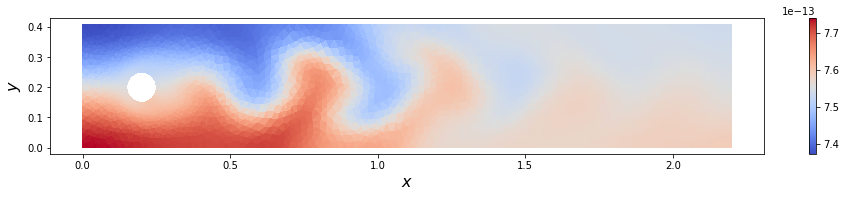

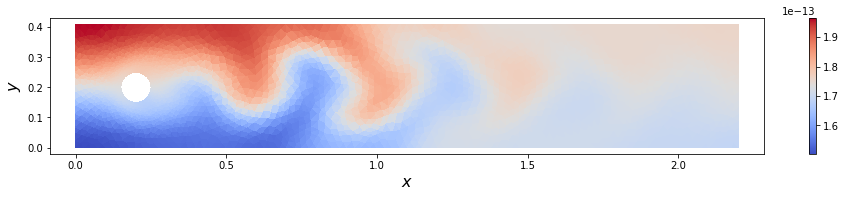

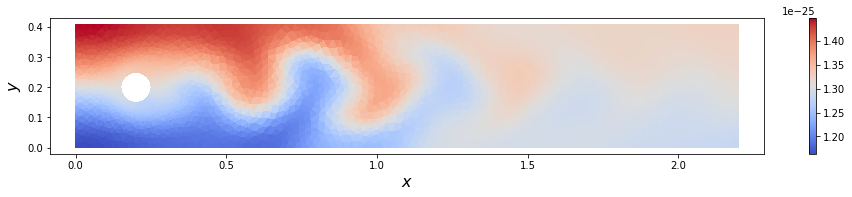

In [25]:
print("Setting up solver.")

# physical constants
nu = fd.Constant(0.001)

# time step
dt = 0.001
# define a firedrake constant equal to dt so that variation forms 
# not regenerated if we change the time step
k = fd.Constant(dt)

# diffusion rate
eps = fd.Constant(0.01)
# reaction rate
K = fd.Constant(10)

mesh = fd.Mesh("../meshes/cylinder.msh")

V = fd.VectorFunctionSpace(mesh, "CG", 2)
Q = fd.FunctionSpace(mesh, "CG", 1)

u = fd.TrialFunction(V)
v = fd.TestFunction(V)
p = fd.TrialFunction(Q)
q = fd.TestFunction(Q)

u_n = fd.Function(V)
u_ = fd.Function(V)
p_n = fd.Function(Q)
p_ = fd.Function(Q)

# creating coupled variables and equations from the reaction formulas
# P1 = fd.FiniteElement("CG", 'triangle', 1)
# element = fd.MixedElement([P1, P1, P1])
# H = fd.FunctionSpace(mesh, element)
H = fd.MixedFunctionSpace([Q, Q, Q])

v_1, v_2, v_3 = fd.TestFunctions(H)
c = fd.Function(H)
c_n = fd.Function(H)

# c_1, c_2, c_3 = c[0], c[1], c[2]
# c_n1, c_n2, c_n3 = c_n[0], c_n[1], c_n[2]
c_1, c_2, c_3 = fd.split(c)
c_n1, c_n2, c_n3 = fd.split(c_n)
_c_1, _c_2, _c_3 = c.split()

# Expressions for the variational forms
n = fd.FacetNormal(mesh)
f = fd.Constant((0.0, 0.0))
u_mid = 0.5*(u_n + u)

def sigma(u, p):
    return 2*nu*fd.sym(fd.nabla_grad(u)) - p*fd.Identity(len(u))


x, y = fd.SpatialCoordinate(mesh)

f_1 = fd.conditional(pow(x-0.1, 2)+pow(y-0.1,2)<0.05*0.05, 0.0, 0)
f_2 = fd.conditional(pow(x-0.1, 2)+pow(y-0.3,2)<0.05*0.05, 0.0, 0)
f_3 = fd.Constant(0.0)
_c_1.interpolate(fd.conditional(pow(x-0.1, 2)+pow(y-0.1,2)<0.05*0.05, 0.1, 0))
_c_2.interpolate(fd.conditional(pow(x-0.1, 2)+pow(y-0.3,2)<0.05*0.05, 0.1, 0))


# Define boundary conditions
bcu = [fd.DirichletBC(V, fd.Constant((0,0)), (1, 4)), # top-bottom and cylinder
          fd.DirichletBC(V, ((4.0*1.5*y*(0.41 - y) / 0.41**2) ,0), 2)] # inflow
bcp = [fd.DirichletBC(Q, fd.Constant(0), 3)]  # outflow

# Define variational forms
F1 = fd.dot((u - u_n)/k, v) * fd.dx \
    + fd.dot(fd.dot(u_n, fd.nabla_grad(u_n)), v) * fd.dx \
    + fd.inner(sigma(u_mid, p_n), fd.sym(fd.nabla_grad(v))) * fd.dx \
    + fd.dot(p_n * n, v) * fd.ds \
    - fd.dot(nu*fd.nabla_grad(u_mid)*n, v) * fd.ds \
    - fd.dot(f, v) * fd.dx

a1, L1 = fd.system(F1)

a2 = fd.dot(fd.nabla_grad(p), fd.nabla_grad(q)) * fd.dx
L2 = fd.dot(fd.nabla_grad(p_n), fd.nabla_grad(q)) * fd.dx \
    - (1/k) * fd.div(u_)*q*fd.dx

a3 = fd.dot(u, v) * fd.dx
L3 = fd.dot(u_, v) * fd.dx \
     - k * fd.dot(fd.nabla_grad(p_ - p_n), v) * fd.dx
                                                    
# Copied from the FENICS implementation
F4 = ((c_1 - c_n1) / k)*v_1*fd.dx \
    + ((c_2 - c_n2) / k)*v_2*fd.dx \
    + ((c_3 - c_n3) / k)*v_3*fd.dx 
F4 += fd.inner(fd.dot(u_, fd.nabla_grad(c_1)), v_1)*fd.dx \
    + fd.inner(fd.dot(u_, fd.nabla_grad(c_2)), v_2)*fd.dx \
    + fd.inner(fd.dot(u_, fd.nabla_grad(c_3)), v_3)*fd.dx
F4 += eps*fd.dot(fd.grad(c_1), fd.grad(v_1))*fd.dx \
    + eps*fd.dot(fd.grad(c_2), fd.grad(v_2))*fd.dx \
    + eps*fd.dot(fd.grad(c_3), fd.grad(v_3))*fd.dx
F4 += K*c_1*c_2*v_1*fd.dx  \
    + K*c_1*c_2*v_2*fd.dx  \
    - K*c_1*c_2*v_3*fd.dx \
    + K*c_3*v_3*fd.dx
F4 += - f_1*v_1*fd.dx \
    - f_2*v_2*fd.dx \
    - f_3*v_3*fd.dx

# Define linear problems
prob1 = fd.LinearVariationalProblem(a1, L1, u_, bcs=bcu)
prob2 = fd.LinearVariationalProblem(a2, L2, p_, bcs=bcp)
prob3 = fd.LinearVariationalProblem(a3, L3, u_)
prob4 = fd.NonlinearVariationalProblem(F4, c, bcs=None)

                                                     

# Define solvers
solve1 = fd.LinearVariationalSolver(prob1, solver_parameters={'ksp_type': 'gmres', 'pc_type': 'sor'})  
solve2 = fd.LinearVariationalSolver(prob2, solver_parameters={'ksp_type': 'gmres', 'pc_type': 'sor'})  
solve3 = fd.LinearVariationalSolver(prob3, solver_parameters={'ksp_type': 'gmres', 'pc_type': 'sor'})
solve4 = fd.NonlinearVariationalSolver(prob4)  

                                                     
# Time loop
t = 0.0
t_end = 5.

print("Beginning time loop...")

while t < t_end :
                                                     
    t += dt
    
    solve1.solve()
    solve2.solve()
    solve3.solve()
    # update solutions
   
    solve4.solve()
    _c_1, _c_2, _c_3 = c.split()
    
    u_n.assign(u_)
    p_n.assign(p_)
    c_n.assign(c)
                                                     
    if( np.abs( t - np.round(t,decimals=0) ) < 1.e-8): 
        print('time = {0:.3f}'.format(t))

print("Simulation complete")

fig = plt.figure(figsize=(16, 2.5))
ax2 = fig.add_subplot(111)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
fd.plot(_c_1, axes=ax2)

fig = plt.figure(figsize=(16, 2.5))
ax2 = fig.add_subplot(111)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
fd.plot(_c_2, axes=ax2)
ax2.axis('equal');

fig = plt.figure(figsize=(16, 2.5))
ax2 = fig.add_subplot(111)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
fd.plot(_c_3, axes=ax2, contour=False)
ax2.axis('equal');

In [ ]:
v_9 = fd.TestFunctions(H)
print(v_9[2])
print(v_3)
c_split = fd.split(c)
print(c_split[2])
print(c[2])

In [ ]:
fig = plt.figure(figsize=(16, 2.5))
ax2 = fig.add_subplot(111)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
fd.plot(_c_1, axes=ax2)

fig = plt.figure(figsize=(16, 2.5))
ax2 = fig.add_subplot(111)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
fd.plot(_c_2, axes=ax2)
ax2.axis('equal');

fig = plt.figure(figsize=(16, 2.5))
ax2 = fig.add_subplot(111)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
fd.plot(_c_3, axes=ax2, contour=False)
ax2.axis('equal');

In [ ]:
fd.NonlinearVariationalSolver?

In [ ]:
print(c.split())
print(fd.split(c))

In [ ]:
print(_c_1.vector())

In [ ]:
print(c_1, _c_1, c_2, _c_2, c_3, _c_3)

In [ ]:
print(u_now.vector().array())

In [ ]:
fd.MixedElement?

In [ ]:
fd.split?

In [ ]:
c.split?

In [ ]:
u_n.assign?